In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets

In [2]:
def laguerre_polynom(t, n, beta = 2.0, sigma = 4.0):
    if beta<0 or beta>sigma:
        raise ValueError("Wrong parameters")

    l_prev = np.sqrt(sigma) * (1 - sigma * t) * np.exp(-beta * t / 2)
    l_prev2 = np.sqrt(sigma) * np.exp(-beta * t / 2)
    if n == 1:
        return l_prev
    if n == 0:
        return l_prev2

    for i in range(2, n + 1):
        temp = l_prev
        l_prev = (2 * i - 1 - sigma * t) * l_prev / i - (i - 1) * l_prev2 / i
        l_prev2 = temp

    return l_prev

In [3]:
laguerre_polynom(
    t=3,
    n=5
)

2.728331346558944

In [4]:
def laguerre_polynom_tabulation(n, t_max, t_step = 0.1, beta = 2.0, sigma = 4.0):
    t_values = np.arange(0, t_max, t_step)
    
    laguerre_values = [laguerre_polynom(t=i,n=n) for i in t_values]
    
    result = pd.DataFrame(data={'t': t_values, f'L_{n}': laguerre_values})
    
    return result

In [5]:
wd1 = ipywidgets.IntSlider(min=1,max=40,value=1)
wd2 = ipywidgets.IntSlider(min=1,max=40,value=1)

In [6]:
ipywidgets.interact(laguerre_polynom_tabulation, n=wd1, t_max=wd2, t_step = ipywidgets.fixed(0.1), beta= ipywidgets.fixed(2.0), sigma= ipywidgets.fixed(4.0))

interactive(children=(IntSlider(value=1, description='n', max=40, min=1), IntSlider(value=1, description='t_ma…

<function __main__.laguerre_polynom_tabulation(n, t_max, t_step=0.1, beta=2.0, sigma=4.0)>

In [7]:
def experiment(n_max = 20, eps = 1e-3, t_max = 100, t_points = 1000, beta = 2.0, sigma = 4.0):
    N = range(0, n_max + 1)
    suitable_t = None
    
    for t in np.linspace(0, t_max, t_points):
        if all(abs(laguerre_polynom(t=t, n=n)) <= eps for n in N):
            suitable_t = t
            break

    result = pd.DataFrame(data={'n': N, 'L_n':
                                [laguerre_polynom(t=suitable_t, n=n) for n in N]})
    
    return suitable_t, result

In [8]:
t, df = experiment()
print(f't = {t}')
df

t = 79.07907907907908


,n,L_n
0,0,9.066138e-35
1,1,-2.858701e-32
2,2,4.478343e-30
3,3,-4.647081e-28
4,4,3.593209e-26
5,5,-2.208132e-24
6,6,1.123332e-22
7,7,-4.865604e-21
8,8,1.831625e-19
9,9,-6.087176e-18


In [9]:
def integral(f, a, b, int_points = 1000):
    x = np.linspace(a, b, int_points)
    s = sum([f(i) for i in x])
    return s * abs(b - a) / int_points

def laguerre_transform(f, n_max, int_points = 10000, beta = 2.0, sigma = 4.0):
    def integrand(t):
        alpha = sigma - beta
        return f(t) * laguerre_polynom(t=t, n=n_max) * np.exp(-alpha * t)

    t_max = experiment(n_max=n_max)[0]

    return integral(integrand, 0, t_max, int_points)

In [10]:
 def laguerre_transform_tabulation(f, n_max, int_points = 10000, sigma = 4.0, beta = 2.0):
    N = range(0, n_max+1)
    return pd.DataFrame({'n': N, f'L_n': [laguerre_transform(f=f, n_max=n) for n in N]})

In [11]:
def f(t):
    if t >= 2 * np.pi:
        return 0
    return np.sin(t - np.pi / 2) + 1


laguerre_transform_tabulation(
    f=f,
    n_max=20,
    int_points=10000
)

,n,L_n
0,0,0.066660
1,1,-0.182204
2,2,0.178056
3,3,-0.074283
4,4,0.007263
5,5,0.007587
6,6,-0.003096
7,7,-0.000615
8,8,0.000799
9,9,-0.000026


In [12]:
def inverse_laguerre_transform(h,t):

    return sum([h[k] * laguerre_polynom(t=t, n=k) for k in range(0, len(h))])

In [13]:
h = laguerre_transform_tabulation(f=f,n_max=20,int_points=10000)['L_n'].tolist()

inverse_laguerre_transform( h=h,t=2
)

1.4159846860964822

In [14]:
def laguerre_polynom_plot(t_max, n_max, t_step = 0.01, beta = 2.0, sigma = 4.0):
    plt.figure(figsize=(20, 15))

    for n in range(0, n_max + 1):
        l_n_tabulation = laguerre_polynom_tabulation(n=n,t_max=t_max,t_step=t_step)
        plt.plot(l_n_tabulation.index, l_n_tabulation[f'L_{n}'], label='L_{' + str(n) + '}')

    plt.title('Многочлени Лагера')
    plt.xlabel('t')
    plt.ylabel('L_n(t)')
    plt.grid()
    plt.savefig("graph1.png")
    plt.show()

In [15]:
wd1 = ipywidgets.IntSlider(min=1,max=40,value=1)
wd2 = ipywidgets.IntSlider(min=1,max=40,value=1)

In [16]:
ipywidgets.interact(laguerre_polynom_plot, t_max=wd1, n_max=wd2, t_step = ipywidgets.fixed(0.001), beta= ipywidgets.fixed(2.0), sigma= ipywidgets.fixed(4.0))

interactive(children=(IntSlider(value=1, description='t_max', max=40, min=1), IntSlider(value=1, description='…

<function __main__.laguerre_polynom_plot(t_max, n_max, t_step=0.01, beta=2.0, sigma=4.0)>

In [17]:
def laguerre_transform_plot(f,n_max,t_max = np.pi * 2,t_step = 0.01,int_points = 10000,beta = 2.0,sigma = 4.0):

    h = laguerre_transform_tabulation(f=f,n_max=n_max)['L_n'].tolist()

    T = np.arange(0, t_max, t_step)
    inverse_laguerre_transform_tabulation = pd.DataFrame(
        {'t': T,'h': [inverse_laguerre_transform(h=h, t=t) for t in T]}
    )

    plt.figure(figsize=(10, 10))

    plt.plot(
        inverse_laguerre_transform_tabulation.index,
        inverse_laguerre_transform_tabulation['h'],
    )

    plt.title('Обернене перетворення Лагера')
    plt.xlabel('t')
    plt.ylabel('func(t)')
    plt.grid()
    plt.savefig("graph2.png")
    plt.show()

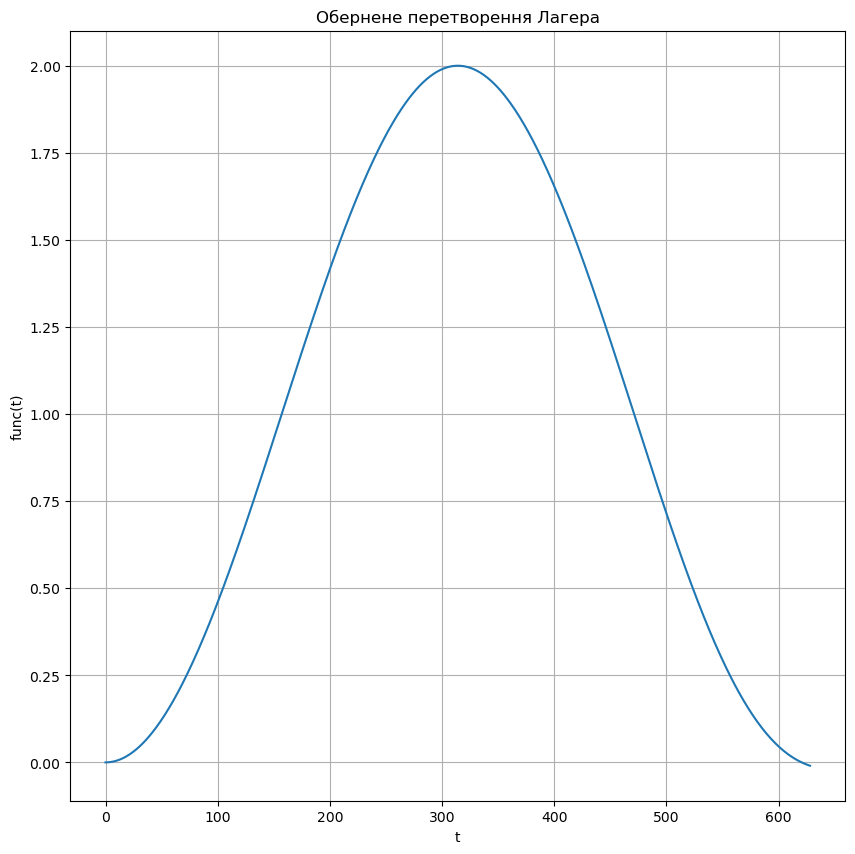

In [18]:
laguerre_transform_plot(
    f=f,
    n_max=20,
    int_points=10000
)

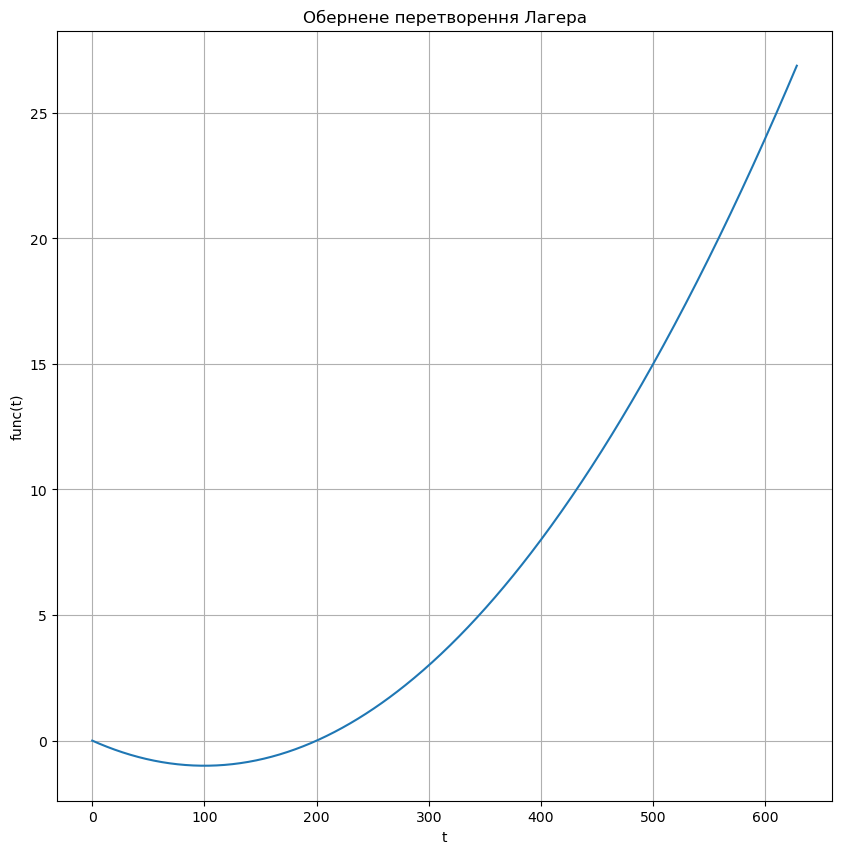

In [19]:
def example(x):
    return x**2-2*x
laguerre_transform_plot(
    f=example,  
    n_max=20,
    int_points=10000
)